<a href="https://colab.research.google.com/github/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/Response%20Prediction%20Classification%20Marketing%20Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✨ Predicting Daily Total Sales Quantity for Kalbe Nutritional Products - ✨**

![banner_kalbe](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals/assets/54845293/0eb4f5a4-5a13-48d9-80d2-02cf463da26a)

## **📍 Table of Content 📍**
- Business Understanding
    - Problem Statement
    - Roles
    - Goals
    - Objectives
    - Business Metrics
- Data Preparation
    - Data Description
    - Libraries & Datasets
- Data Understanding
    - Exploring Datasets
    - Data Types Information
    - Statistical Summary
    - EDA (Exploratory Data Analysis)
    - Feature Engineering / Extraction (Business Insight)
    - Business Insight

## **⚙ Work Environment ⚙**

- **Tools**

[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/Response%20Prediction%20Classification%20Marketing%20Campaign.ipynb)

- **Programming Language**

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

- **Git and Github**

Repository : [VIX Inventory Marketing Kalbe Nutritionals](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals)

- **Libraries**

[Requirements Text](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals/blob/main/requirements.txt)

- **Dataset**

[List Datasets](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals/tree/main/datasets)

## **⛳ Business Understanding ⛳**

### **📌 Problem Statement**

**Problem Statement:**

As a Data Scientist at Kalbe Nutritionals, you have been tasked with a new project by the inventory and marketing teams. The inventory team seeks assistance in predicting the total daily sales quantity for all Kalbe products. To address this challenge effectively, you need to develop a robust predictive model that can forecast the daily sales quantity accurately. This predictive capability will enable the company to optimize inventory management, reduce costs, and ensure product availability. Additionally, it will support the marketing team in planning and executing targeted campaigns to boost sales. Your goal is to create a data-driven solution that enhances both inventory control and marketing strategies, ultimately contributing to the company's growth and customer satisfaction.




### **📌 Objectives**
Develop a daily sales quantity prediction model for all Kalbe Nutritionals products to support inventory and marketing teams.

### **📌 Goals**
1. Create a robust predictive model that accurately forecasts daily sales quantities for all Kalbe products.
2. Enable the inventory team to optimize daily stock levels to meet demand while minimizing excess inventory.
3. Facilitate cost reduction through improved inventory management practices.
4. Ensure product availability and prevent stockouts by aligning production and distribution with predicted sales.
5. Assist the marketing team in planning and executing targeted campaigns based on sales forecasts to boost sales.
6. Enhance customer satisfaction by maintaining consistent product availability.
7. Foster company growth through data-driven decision-making, optimizing both inventory control and marketing strategies.

# **🛒 Data Preparation 🛒**

## **🕹 Data Description 🕹**

```
🚨✨ This Project and Datasets is from Kalbe Nutritionals Data Scientist Project Based Internship Program ✨🚨 
```

**Case Study - Legend:**

This dataset consists of 4 CSV files: customer, store, product, and transaction. It serves as dummy data for a Fast-Moving Consumer Goods (FMCG) case study conducted over a one-year period through a membership program.

**1. Customer**:
- `CustomerID`: Unique Customer ID
- `Age`: Customer's Age
- `Gender`: 0 for Female, 1 for Male
- `Marital Status`: Married, Single (Unmarried/Previously Married)
- `Income`: Monthly Income in millions of Indonesian Rupiah

**2. Store**:
- `StoreID`: Unique Store Code
- `StoreName`: Store Name
- `GroupStore`: Group Name
- `Type`: Modern Trade, General Trade
- `Latitude`: Latitude Code
- `Longitude`: Longitude Code

**3. Product**:
- `ProductID`: Unique Product Code
- `Product Name`: Product Name
- `Price`: Price in Indonesian Rupiah

**4. Transaction**:
- `TransactionID`: Unique Transaction Code
- `Date`: Transaction Date
- `Qty`: Quantity of items purchased
- `Total Amount`: Price x Qty

## **💉 Import Libraries 💉**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from tabulate import tabulate

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap


# Forecasting
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller, kpss
import pmdarima as pm
# import pyramid as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

## **📚 Import Dataset 📚**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
customers = pd.read_csv('datasets/Case Study - Customer.csv')
store = pd.read_csv('datasets/Case Study - Store.csv')
product = pd.read_csv('datasets/Case Study - Product.csv')
transaction = pd.read_csv('datasets/Case Study - Transaction.csv')

In [3]:
customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.120
1,2,60,1,Married,6.230
2,3,32,1,Married,9.170
3,4,31,1,Married,4.870
4,5,58,1,Married,3.570


In [4]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200,106.817
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.915,107.608
2,3,Prima Kota,Prima,Modern Trade,-7.797,110.371
3,4,Gita Ginara,Gita,General Trade,-6.967,110.417
4,5,Bonafid,Gita,General Trade,-7.250,112.769


In [5]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [6]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


Untuk memudahkan proses observasi dan pemodelan maka akan dilakukan penggabungan dataset ke dataset utama transaction

In [7]:
# menggabungkan datasets
df = pd.merge(transaction, customers, on='CustomerID')
df = pd.merge(df, store, on='StoreID')
df = pd.merge(df, product,on='ProductID')

# mengubah nama dan urutan kolom
df.drop("Price_y", axis=1, inplace=True)
df.rename(columns={"Price_x":"Price"}, inplace=True)

for col in df.columns:
    df.rename(columns= {col: col.replace(" ", "")}, inplace = True)

df = df[['TransactionID', 'Date', 'Price', 'Qty', 'TotalAmount',
     'ProductID', 'ProductName', 'CustomerID', 'Age', 
     'Gender', 'MaritalStatus', 'Income', 'StoreID', 
     'StoreName', 'GroupStore', 'Type', 'Latitude', 'Longitude']].copy()

df.head()

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,01/01/2022,7500,4,30000,P3,Crackers,328,36,0,Married,10.530,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
1,TR89318,17/07/2022,7500,1,7500,P3,Crackers,183,27,1,Single,0.180,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
2,TR9106,26/09/2022,7500,4,30000,P3,Crackers,123,34,0,Married,4.360,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
3,TR4331,08/01/2022,7500,3,22500,P3,Crackers,335,29,1,Single,4.740,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
4,TR6445,10/01/2022,7500,4,30000,P3,Crackers,181,33,1,Married,9.940,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757


# **💡 Data Understanding 💡**

## **📌 Explore Datasets**

### **Basic Datasets Information**

In [8]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (5020, 18)
Number of rows : 5020
Number of columns : 18


In [9]:
df.columns

Index(['TransactionID', 'Date', 'Price', 'Qty', 'TotalAmount', 'ProductID',
       'ProductName', 'CustomerID', 'Age', 'Gender', 'MaritalStatus', 'Income',
       'StoreID', 'StoreName', 'GroupStore', 'Type', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  5020 non-null   object 
 1   Date           5020 non-null   object 
 2   Price          5020 non-null   int64  
 3   Qty            5020 non-null   int64  
 4   TotalAmount    5020 non-null   int64  
 5   ProductID      5020 non-null   object 
 6   ProductName    5020 non-null   object 
 7   CustomerID     5020 non-null   int64  
 8   Age            5020 non-null   int64  
 9   Gender         5020 non-null   int64  
 10  MaritalStatus  4976 non-null   object 
 11  Income         5020 non-null   float64
 12  StoreID        5020 non-null   int64  
 13  StoreName      5020 non-null   object 
 14  GroupStore     5020 non-null   object 
 15  Type           5020 non-null   object 
 16  Latitude       5020 non-null   float64
 17  Longitude      5020 non-null   float64
dtypes: float

**Observations:**

- Dataset memiliki `18 columns` dan `5020 rows` data
- Terdapat 3 jenis tipe data yaitu : `int64, float64, object`
- Kolom `MaritalStatus` memiliki `44 nilai null / missing values`

### **Checking Duplicate Rows**

In [11]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude


In [12]:
df.duplicated().sum()

0

**Observations:** Data yang kita miliki tidak memiliki duplikat

### **Checking Missing Values**

In [13]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

TransactionID     0
Date              0
Price             0
Qty               0
TotalAmount       0
ProductID         0
ProductName       0
CustomerID        0
Age               0
Gender            0
MaritalStatus    44
Income            0
StoreID           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
dtype: int64

In [14]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
MaritalStatus,44,0.876494,object
TransactionID,0,0.000000,object
Date,0,0.000000,object
Price,0,0.000000,int64
Qty,0,0.000000,int64
TotalAmount,0,0.000000,int64
ProductID,0,0.000000,object
ProductName,0,0.000000,object
CustomerID,0,0.000000,int64
Age,0,0.000000,int64


In [15]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))

MaritalStatus = True - ['nan']


<Figure size 1000x600 with 0 Axes>

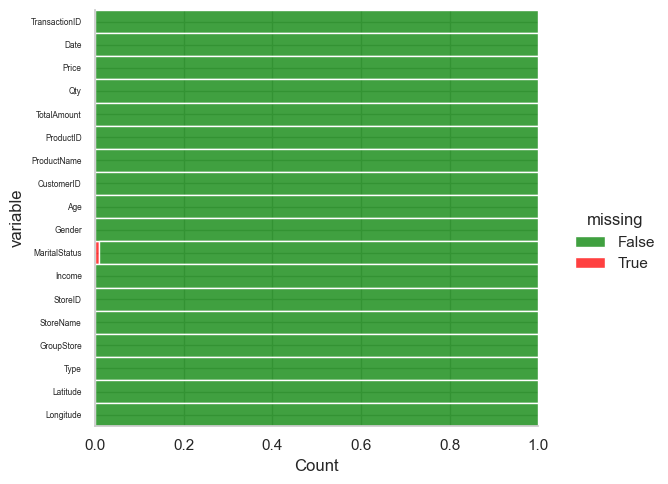

In [16]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["green","red"]
)

dms.set_yticklabels(size = 6)

**Observations:**
- Kolom `MaritalStatus` memiliki `44 nilai null / missing values`, persentase sebesar 0.87% dari jumlah data

### **Division by Type of Data**

In [17]:
df.head()

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,01/01/2022,7500,4,30000,P3,Crackers,328,36,0,Married,10.530,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
1,TR89318,17/07/2022,7500,1,7500,P3,Crackers,183,27,1,Single,0.180,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
2,TR9106,26/09/2022,7500,4,30000,P3,Crackers,123,34,0,Married,4.360,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
3,TR4331,08/01/2022,7500,3,22500,P3,Crackers,335,29,1,Single,4.740,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
4,TR6445,10/01/2022,7500,4,30000,P3,Crackers,181,33,1,Married,9.940,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757


In [18]:
cat_id_cols = ["TransactionID", "ProductID", "CustomerID", "StoreID"]
cat_cols = ["ProductName", "Gender", "MaritalStatus", 
            "StoreName", "GroupStore", "Type"]
            
num_cols = ["Price", "Qty", "TotalAmount", "Age", 
            "Income", "Latitude", "Longitude"]

timestamp = ["Date"]

In [19]:
df.columns

Index(['TransactionID', 'Date', 'Price', 'Qty', 'TotalAmount', 'ProductID',
       'ProductName', 'CustomerID', 'Age', 'Gender', 'MaritalStatus', 'Income',
       'StoreID', 'StoreName', 'GroupStore', 'Type', 'Latitude', 'Longitude'],
      dtype='object')

## **📌 Data Types Information**

In [20]:
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  5020 non-null   object 
 1   Date           5020 non-null   object 
 2   Price          5020 non-null   int64  
 3   Qty            5020 non-null   int64  
 4   TotalAmount    5020 non-null   int64  
 5   ProductID      5020 non-null   object 
 6   ProductName    5020 non-null   object 
 7   CustomerID     5020 non-null   int64  
 8   Age            5020 non-null   int64  
 9   Gender         5020 non-null   int64  
 10  MaritalStatus  4976 non-null   object 
 11  Income         5020 non-null   float64
 12  StoreID        5020 non-null   int64  
 13  StoreName      5020 non-null   object 
 14  GroupStore     5020 non-null   object 
 15  Type           5020 non-null   object 
 16  Latitude       5020 non-null   float64
 17  Longitude      5020 no

**Change the Some column data type**

Untuk memudahkan dalam proses extraction date maupun part of, maka kolom date `object` diubah menjadi `datetime64`

In [21]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y', infer_datetime_format=True)

In [22]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   Date           5020 non-null   datetime64[ns]
 2   Price          5020 non-null   int64         
 3   Qty            5020 non-null   int64         
 4   TotalAmount    5020 non-null   int64         
 5   ProductID      5020 non-null   object        
 6   ProductName    5020 non-null   object        
 7   CustomerID     5020 non-null   int64         
 8   Age            5020 non-null   int64         
 9   Gender         5020 non-null   int64         
 10  MaritalStatus  4976 non-null   object        
 11  Income         5020 non-null   float64       
 12  StoreID        5020 non-null   int64         
 13  StoreName      5020 non-null   object        
 14  GroupStore     5020 non-null   object      

In [23]:
df.head()

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,2022-01-01,7500,4,30000,P3,Crackers,328,36,0,Married,10.530,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
1,TR89318,2022-07-17,7500,1,7500,P3,Crackers,183,27,1,Single,0.180,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
2,TR9106,2022-09-26,7500,4,30000,P3,Crackers,123,34,0,Married,4.360,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
3,TR4331,2022-01-08,7500,3,22500,P3,Crackers,335,29,1,Single,4.740,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
4,TR6445,2022-01-10,7500,4,30000,P3,Crackers,181,33,1,Married,9.940,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757


## **📌 Statistical Summary**

### **Numerical + Date Features**

In [24]:
print('The number of numerical features is {}'.format(len(num_cols)))

df[num_cols].describe(datetime_is_numeric=True).fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

The number of numerical features is 7


,Price,Qty,TotalAmount,Age,Income,Latitude,Longitude
count,5020,5020,5020,5020,5020,5020,5020
mean,9684.801,3.645,32279.482,40.004,8.624,-2.942,109.601
std,4600.709,1.855,19675.462,12.835,6.518,4.323,8.358
min,3200,1,7500,0,0,-7.797,95.324
25%,4200,2,16000,30,4.220,-6.915,104.757
50%,9400,3,28200,39,7.720,-5.135,110.371
75%,15000,5,47000,51,10.780,0.534,114.590
max,18000,10,88000,72,71.300,5.548,128.191


### **Categorical Features**

In [25]:
print('The number of categorical features is {}'.format(len(cat_cols)))

The number of categorical features is 6


In [26]:
dfc = df.copy()
cat = (cat_cols + cat_id_cols).copy()
for i in cat:
    dfc[i] = dfc[i].astype("category")
cat.insert(0, "Date")
dfc[cat].describe().transpose()

,count,unique,top,freq,first,last
Date,5020,365,2022-03-02 00:00:00,31,2022-01-01,2022-12-31
ProductName,5020,10,Thai Tea,814,NaT,NaT
Gender,5020,2,0,2746,NaT,NaT
MaritalStatus,4976,2,Married,3779,NaT,NaT
StoreName,5020,12,Lingga,738,NaT,NaT
GroupStore,5020,7,Prima,1085,NaT,NaT
Type,5020,2,General Trade,2851,NaT,NaT
TransactionID,5020,4908,TR71313,3,NaT,NaT
ProductID,5020,10,P5,814,NaT,NaT
CustomerID,5020,447,156,21,NaT,NaT


In [27]:
#cek unique value
dfc = df.copy()
dfc['MaritalStatus'] = dfc['MaritalStatus'].fillna(dfc['MaritalStatus'].mode()[0])
for x in dfc.columns :         
    unq = list(dfc[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== TransactionID =====
['TR11369', 'TR89318', 'TR9106', 'TR4331', 'TR6445', 'TR38909', 'TR36491', 'TR20045', 'TR12061', 'TR39272', '.....']

===== Date =====
[numpy.datetime64('2022-01-01T00:00:00.000000000'), numpy.datetime64('2022-07-17T00:00:00.000000000'), numpy.datetime64('2022-09-26T00:00:00.000000000'), numpy.datetime64('2022-01-08T00:00:00.000000000'), numpy.datetime64('2022-01-10T00:00:00.000000000'), numpy.datetime64('2022-03-04T00:00:00.000000000'), numpy.datetime64('2022-01-03T00:00:00.000000000'), numpy.datetime64('2022-01-20T00:00:00.000000000'), numpy.datetime64('2022-03-28T00:00:00.000000000'), numpy.datetime64('2022-12-21T00:00:00.000000000'), '.....']

===== Price =====
[7500, 10000, 3200, 15000, 4200, 8800, 16000, 12000, 9400, 18000, '.....']

===== Qty =====
[4, 1, 3, 5, 6, 2, 7, 10, 8, 9, '.....']

===== TotalAmount =====
[30000, 7500, 22500, 37500, 45000, 15000, 70000, 50000, 10000, 20000, '.....']

===== ProductID =====
['P3', 'P9', 'P2', 'P10', 'P5', 'P1', 'P

In [28]:
cat = cat_cols.copy()
cat.insert(0, "Date")
for i in cat:
    print(i)
    print(df[i].value_counts().iloc[:10])
    print()

Date
2022-03-02    31
2022-07-01    27
2022-03-03    27
2022-04-01    26
2022-01-15    25
2022-12-01    25
2022-12-24    24
2022-09-26    24
2022-05-19    24
2022-03-11    24
Name: Date, dtype: int64

ProductName
Thai Tea        814
Cheese Stick    620
Ginger Candy    530
Coffee Candy    522
Crackers        519
Yoghurt         488
Oat             485
Choco Bar       397
Potato Chip     390
Cashew          255
Name: ProductName, dtype: int64

Gender
0    2746
1    2274
Name: Gender, dtype: int64

MaritalStatus
Married    3779
Single     1197
Name: MaritalStatus, dtype: int64

StoreName
Lingga              738
Sinar Harapan       698
Buana               368
Prima Kota          367
Prima Kelapa Dua    364
Prestasi Utama      363
Bonafid             362
Harapan Baru        355
Buana Indah         355
Prima Tendean       354
Name: StoreName, dtype: int64

GroupStore
Prima           1085
Lingga           738
Buana            723
Prestasi         718
Gita             712
Harapan Baru     698


# **⚙ Data Understanding ⚙**

## **📌 Handling Duplicate Rows**

In [29]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude


In [30]:
df.duplicated().sum()

0

In [31]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (5020, 18)
Data Frame Dimension After Duplicate Removal: (5020, 18)


In [32]:
df[df.duplicated(subset=["TransactionID", "CustomerID"], keep=False)].sort_values(by=list(df.columns.values)).head(6)

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude


In [33]:
df.duplicated(subset=["TransactionID", "CustomerID"]).sum()

0

## **📌 Handling Missing Value**

Melakukan pengecekan jumlah Missing Values dan Persentase nya

In [34]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
MaritalStatus,44,0.876494,object
TransactionID,0,0.000000,object
Date,0,0.000000,datetime64[ns]
Price,0,0.000000,int64
Qty,0,0.000000,int64
TotalAmount,0,0.000000,int64
ProductID,0,0.000000,object
ProductName,0,0.000000,object
CustomerID,0,0.000000,int64
Age,0,0.000000,int64


### **Imputation**

Imputation (Mode), karena Categorical

In [35]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

Imputation using `fillna`

In [36]:
# mode = df['MaritalStatus'].mode()[0]
# df['MaritalStatus'].fillna(mode, inplace=True)
# df['MaritalStatus'].isna().sum()

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

Dikarenakan pada proses multivariate approach memerlukan semua feature bertipe numerical sehingga untuk data yang masih bertipe object/string dan date akan di drop pada data temp

In [37]:
df_ma = df.copy()

In [38]:
col_drop = timestamp+cat_id_cols+["Latitude", "Longitude"]
df_ma = df_ma.drop(col_drop, axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ["ProductName", "StoreName", "GroupStore", "Type"]:
    df_ma[i] = le.fit_transform(df_ma[i])
    print(le.classes_)
    
map_ms = {
    'Single' : 0,
    'Married' : 1
}

df_ma['MaritalStatus'] = df_ma['MaritalStatus'].map(map_ms)

['Cashew' 'Cheese Stick' 'Choco Bar' 'Coffee Candy' 'Crackers'
 'Ginger Candy' 'Oat' 'Potato Chip' 'Thai Tea' 'Yoghurt']
['Bonafid' 'Buana' 'Buana Indah' 'Gita Ginara' 'Harapan Baru' 'Lingga'
 'Prestasi Utama' 'Priangan' 'Prima Kelapa Dua' 'Prima Kota'
 'Prima Tendean' 'Sinar Harapan']
['Buana' 'Gita' 'Harapan Baru' 'Lingga' 'Prestasi' 'Priangan' 'Prima']
['General Trade' 'Modern Trade']


In [40]:
df_ma.head()

,Price,Qty,TotalAmount,ProductName,Age,Gender,MaritalStatus,Income,StoreName,GroupStore,Type
0,7500,4,30000,4,36,0,1,10.530,6,4,0
1,7500,1,7500,4,27,1,0,0.180,6,4,0
2,7500,4,30000,4,34,0,1,4.360,6,4,0
3,7500,3,22500,4,29,1,0,4.740,6,4,0
4,7500,4,30000,4,33,1,1,9.940,6,4,0


#### **Implementation Multivariate Approach**

**Two main methods we use here to impute missing values**

- `KNN Imputer` or K-Nearest Neighbor
- `MICE` or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `miceforest`

#### **Imputation using `KNNImputer`**

In [41]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

In [42]:
# from sklearn.impute import KNNImputer

# # Train
# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["MaritalStatus"] = np.where(df_imputed["MaritalStatus"] > 0.5, "Married", "Single").copy()
# df["MaritalStatus"].unique()

In [43]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

#### **Imputation using `MICE` with `IterativeImputer`**

In [44]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

In [45]:
# # Note: make sure to import the enable_iterative_imputer function before 
# # you import the IterativeImputer, as the feature is classified as 
# # experimental, and failing to do so will result in an ImportError.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Train
# df_imputed = pd.DataFrame(
#     imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["MaritalStatus"] = np.where(df_imputed["MaritalStatus"] > 0.5, "Married", "Single").copy()
# df["MaritalStatus"].unique()

In [46]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

#### **Imputation using `MICE` with `LightGBM`**

In [47]:
print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

Jumlah missing values Marital Status sebelum Imputation = 44


In [48]:
import miceforest as mf

df_ma_amp = mf.ampute_data(df_ma, perc=0.25,random_state=1991)

# Create kernel. 
kds = mf.ImputationKernel(
  data = df_ma,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed = kds.complete_data()
df["MaritalStatus"] = np.where(df_imputed["MaritalStatus"] > 0.5, "Married", "Single").copy()
df["MaritalStatus"].unique()

array(['Married', 'Single'], dtype=object)

In [49]:
print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

Jumlah missing values Marital Status sebelum Imputation = 0


## **📌 Creating Time Series Data**

In [50]:
df_ts = df[['Date','Qty']]
df_ts = df_ts.groupby('Date').agg({"Qty":"sum"})
df_ts.head()

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30


# **✨ Exploratory Data Analysis (EDA) ✨**

### **📌 Check Quantity based on Date** ###

Let’s draw a simple line plot for dataset time series to understand the pattern in the data and how the temperature is trending. It looks like that a Cyclic pattern is followed here

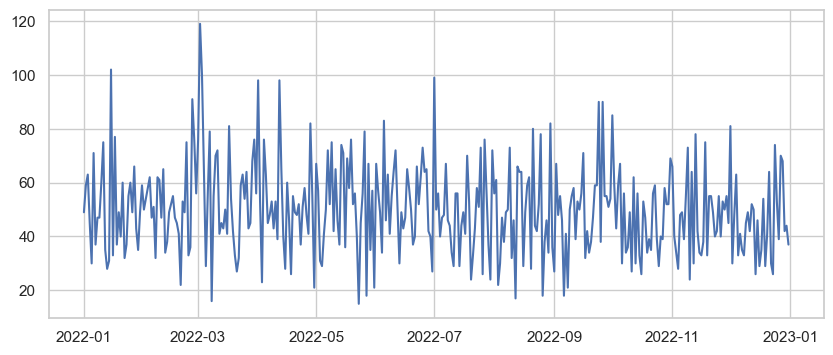

In [51]:
plt.figure(figsize=(10,4))
plt.plot(df_ts["Qty"])

We will draw a Box and Whisker plot for month-to-month to understand the data distribution and get a quick five point summary for the data

<Axes: title={'center': 'Qty'}, ylabel='Month'>

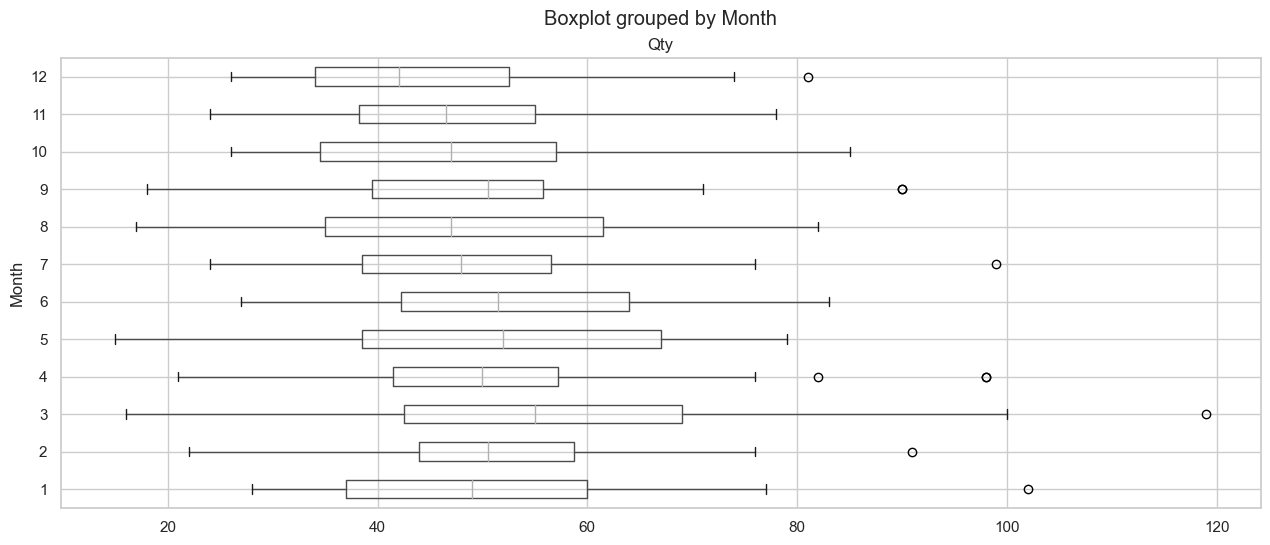

In [52]:
df_ts_n = df_ts.copy()
df_ts_n.reset_index(inplace=True)
df_ts_n["Month"] = df_ts_n["Date"].dt.month
df_ts_n.boxplot(figsize=(15,6),by='Month',column='Qty',vert=False)

### **📌 Data Decomposition** ###

To further analyze the time series data, Decomposition helps to remove the seasonality from the data.

Basically Decomposition has three components that is shown in the graphs below i.e Trend, Seasonality and Residual

You have to choose a model type also additive or multiplicative. We have taken an additive model because the seasonality doesn’t varies much from start to end of the date.

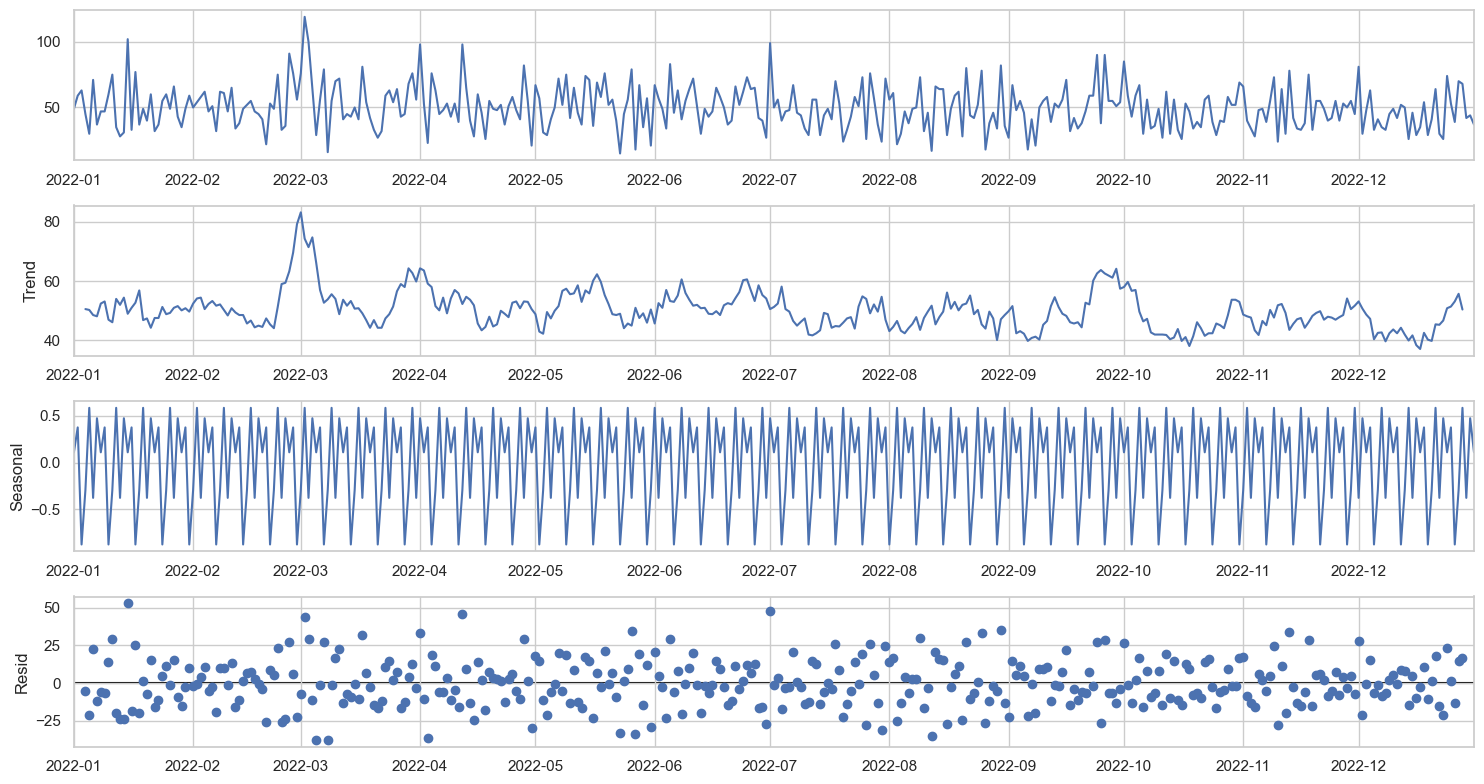

In [53]:
decomposition = seasonal_decompose(df_ts, model='additive')
fig = decomposition.plot()

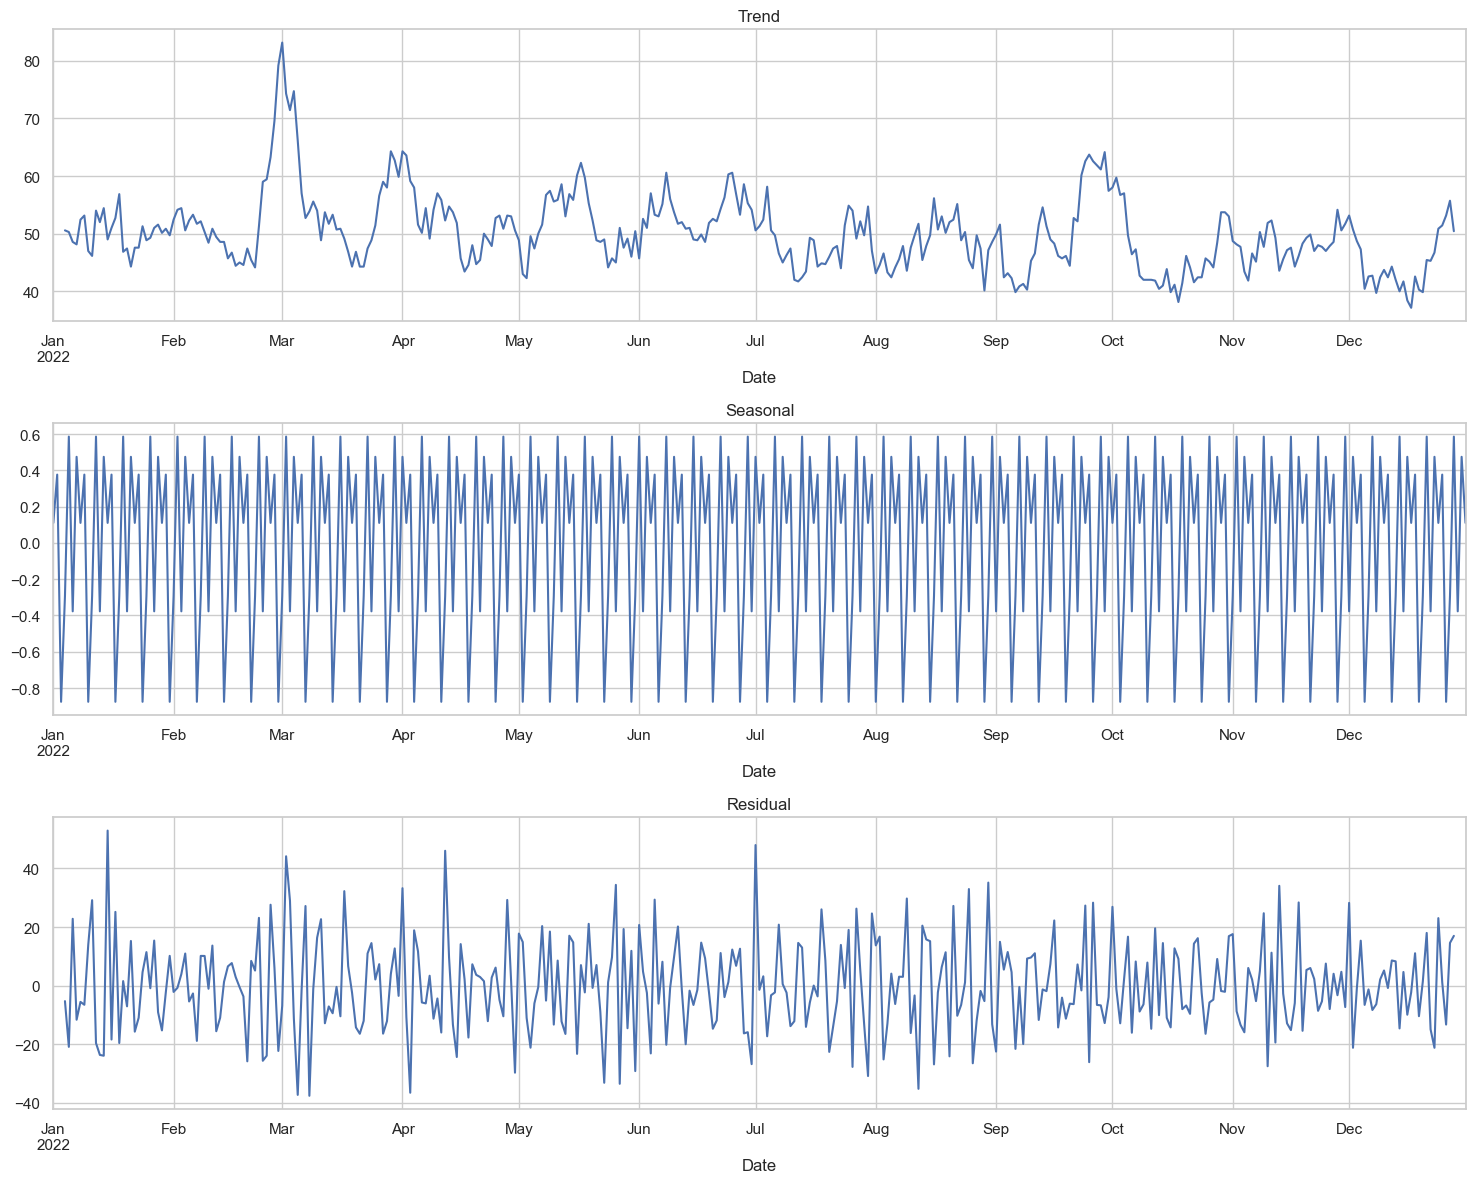

In [54]:
fig,ax = plt.subplots(3,1,figsize=(15,12))
decomposition.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decomposition.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decomposition.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

From this plot, we can clearly see the there is not increasing trend in number of quantity and, There is the seasonality patterns each day

### **📌 Check Stationarity** ###

Stationary data refers to the time series data that mean and variance do not vary across time. The data is considered non-stationary if there is a strong trend or seasonality observed from the data.

In most cases it is important. This is because much statistical analysis or model is built upon the assumption that mean and variance are consistent over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series

When we fit a stationary model to the time series data that we want to analyze, we should detect the stationarity of the data and remove the trend/seasonality effect from the data.

Many current time series models like ARIMA have options to include steps to convert the original data into stationary data or which makes our life more convenient. However, it would still be beneficial if we can understand the stationarity of the data so that we can give a better input to the model.

---
You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).


---

ARIMA model works better on a Non-Stationary data and the first thing that we should be checking is the Stationarity of the data. The Augmented Dickey-Fuller test can be used to test the null hypothesis that the series is non-stationary

The ADF test helps to understand whether a change in Y is a linear trend or not. If there is a linear trend but the lagged value cannot explain the change in Y over time, then our data will be deemed non-stationary

- H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

- HA: The time series is stationary.

The ADF test results will give you a test statistic and a p-value. The test statistic is compared to the critical values at different significance levels, usually 1%, 5%, and 10%. 

If the test statistic is more negative than the critical value, you can reject the null hypothesis and conclude that the time series is stationary. If the test statistic is less negative than the critical value, you cannot reject the null hypothesis and conclude that the time series has a unit root. 

The p-value is the probability of obtaining a test statistic as extreme or more extreme than the observed one under the null hypothesis.If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

#### **Plotting Rolling Statistics**

Let’s test for stationarity in our data. To start, let’s calculate a monthly rolling:
> Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. This is still visual method

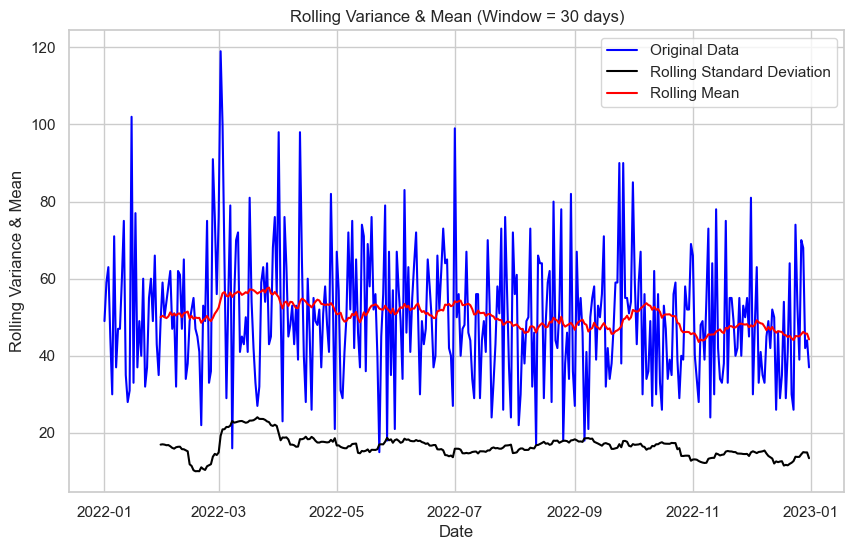

In [55]:
# Compute rolling variance and plot
rolling_std = df_ts['Qty'].rolling(window=30).std()
rolling_mean = df_ts['Qty'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_ts.index, df_ts['Qty'], color="blue", label="Original Data")
plt.plot(df_ts.index, rolling_std, color="black", label = "Rolling Standard Deviation")
plt.plot(df_ts.index, rolling_mean, color="red", label="Rolling Mean")
plt.xlabel('Date')
plt.ylabel('Rolling Variance & Mean')
plt.title(f'Rolling Variance & Mean (Window = 30 days)')

plt.legend()

plt.show()

Based on the Plot, This is stationary because mean and std is small not in trend

#### **ADF (Augmented Dickey Fuller) Test**

Next, let’s import the augmented Dickey-Fuller test from the statsmodels package. The documentation for the test can be found [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

- `Null Hypothesis (H0)`: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- `Alternate Hypothesis (H1)`: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- `p-value > 0.05`: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- `p-value <= 0.05`: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Here, we specify the autolag parameter as "AIC", which means that the lag is chosen to minimize the information criterion.

> The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.

In [56]:
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The ADF test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))
        
check_stationarity(df_ts)

The ADF test statistic: -19.448086
p-value: 0.000000
Critical Values:
1%: -3.448
5%: -2.870
10%: -2.571


The value of test statistics is less than 5% critical value and p-value is also less than 0.05 so we can reject the null hypothesis and Alternate Hypothesis that time series is Stationary seems to be true. Which means my step count data is Stationary at 1%/5%/10% significance level. You can also compare the ADF statistic against critical values at different significance levels. The more negative the ADF statistic compared to critical values the more stationary the data.

The test statistic: -19.018783 p-value: 0 Critical Values: 1%: -3.448 5%: -2.870 10%: -2.571

> The test statistics is smaller than the 1% critical values. That tells us that we are 99% confident that this series is stationary.

There is nothing unusual about the time plot and there appears to be no need to do any data adjustments. There is no evidence of changing variance also so we will not do a Box-Cox transformation.

#### **KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test**

KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [57]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(df_ts)

Results of KPSS Test:
Test Statistic          0.777
p-value                 0.010
Lags Used                   2
Critical Value (10%)    0.347
Critical Value (5%)     0.463
Critical Value (2.5%)   0.574
Critical Value (1%)     0.739
dtype: float64


C:\Users\nurim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### **📌 Autocorrelation** ###

Checking time series data for autocorrelation in Python is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values, which has huge implications across many industries. For example, if our data has strong autocorrelation, we can assume that high qunatity numbers today suggest a strong likelihood that they will be high tomorrow as well.

The Pandas data frame has an autocorrelation method that we can use to calculate the autocorrelation in our data. Let’s do this for a daily lag:

In [58]:
autocorrelation_lag1 = df_ts['Qty'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = df_ts['Qty'].autocorr(lag=3)
print("Three Day Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df_ts['Qty'].autocorr(lag=6)
print("Six Day Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df_ts['Qty'].autocorr(lag=9)
print("Nine Day Lag: ", autocorrelation_lag9)

One Day Lag:  -0.022748783231496966
Three Day Lag:  -0.019347393971946642
Six Day Lag:  0.06457811856504064
Nine Day Lag:  0.03944901184560253


We see that the data is not-autocorrelated. This is further illustration of the short- and long-term trends in the data.

## **💡 Split Data Training and Testing** ##

In [59]:
# There are 31 days in December 2022
df_train = df_ts.iloc[:-31]
df_test = df_ts.iloc[-31:]

# Check the shapes of the train and test sets
print("Data Training:", df_train.shape)
print("Data Testing:", df_test.shape)

Data Training: (334, 1)
Data Testing: (31, 1)


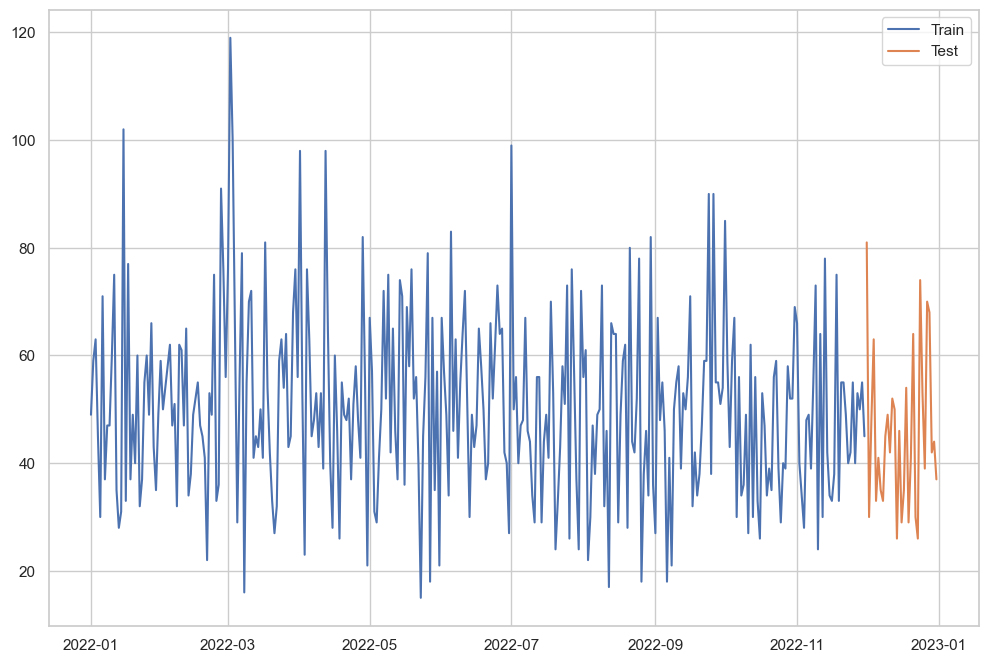

In [60]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index, df_train['Qty'], label='Train')
plt.plot(df_test.index,df_test['Qty'], label='Test')
plt.legend(loc='best')
plt.show()

# **🔥 Modelling & Evaluation 🔥**

7 methods to perform Time Series forecasting :
- Method 1: Naive Forecast Python
- Method 2: Simple Average
- Method 3: Moving Average Time Series Forecasting Python
- Method 4: Simple Exponential Smoothing
- Method 5: Holt’s Linear Trend method
- Method 6: Holt-Winters Method
- Method 7: ARIMA

## **📌 Method 1: Naive Forecast**

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

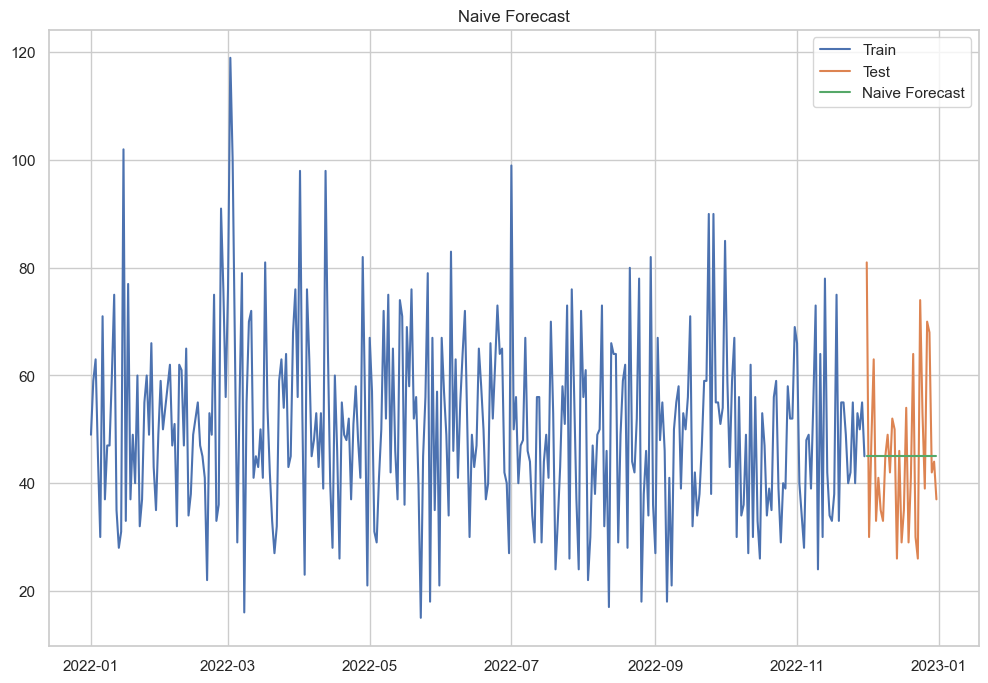

In [61]:
dd= np.asarray(df_train.Qty)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(df_train.index, df_train['Qty'], label='Train')
plt.plot(df_test.index,df_test['Qty'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We will now calculate RMSE to check to accuracy of our model on test data set.

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(df_test.Qty, y_hat.naive))
print(rms)

14.529169769589327


We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. Now we will look at another technique and try to improve our score.

**Seasonal Naive Forecasting**

The method is an extension of the naive method, but this time the forecast is equal to the most recent observed value in the same season. Hence, it is know as the seasonal naive model. For example, the forecast for the next quarter one is equal to the previous years quarter one value, this case we use monthly basis. This model is useful when we have a clear and large seasonal variation in our time series.

The naive forecast we created takes the very last day of sales to use as the forecast. We can try to improve on this by taking into account seasonal fluctuations in the data. Now, seasonal doesn't necessarily mean summer, autumn, winter and spring. It can mean a weekly pattern, or a daily pattern. Maybe a store is always busy on Saturday, but quiet on Monday.

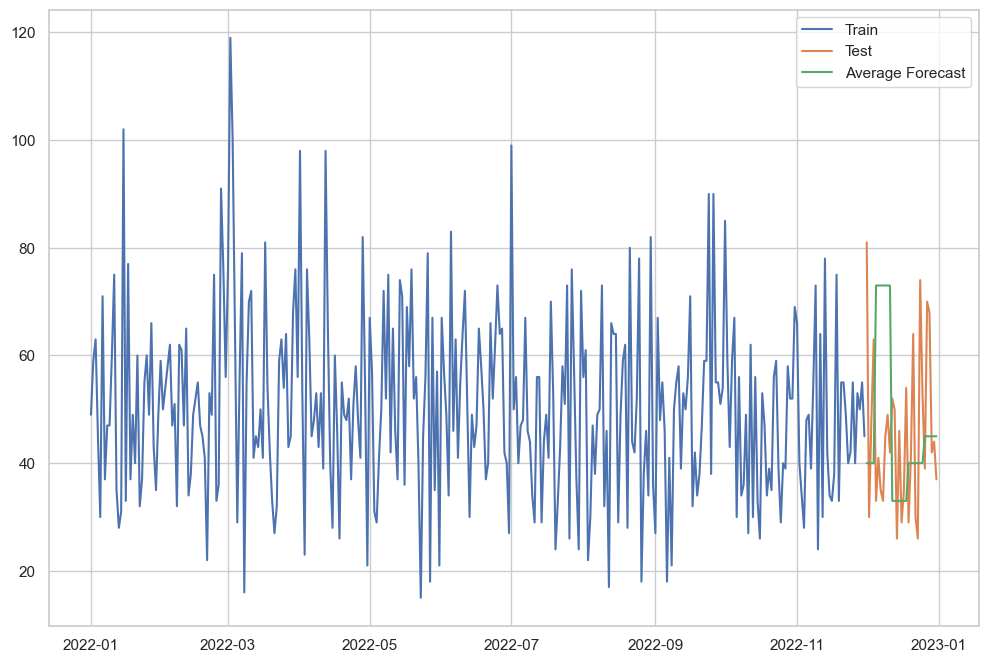

In [63]:
# Seasonal naive forecast
train = df_train.reset_index().copy()
test = df_test.reset_index().copy()

from math import ceil
def week_of_month(df_temp):
    """ Returns the week of the month for the specified date.
    """
    df_temp["Date_x"] = df_temp["Date"].astype(str)
    df_temp['first_day_aux']=pd.to_datetime(df_temp['Date_x'][0][:8]+'01') 
    df_temp['day']=df_temp['Date'].dt.day 
    df_temp['adjusted_dom']=df_temp['day']+df_temp['first_day_aux'].dt.dayofweek
    
    return np.int_(np.ceil(df_temp['adjusted_dom']/7.0))

# Generate Week
train['Week'] = week_of_month(train)
test['Week'] = week_of_month(test)

snaive_fc = []
for row_idx, row in test.iterrows():
    week = row['Week']
    forecast = train['Qty'].loc[train['Week'] == week].iloc[-1]
    snaive_fc.append(forecast)

frc = df_test.copy()
frc['Qty'] = snaive_fc
    
plt.figure(figsize=(12,8))
plt.plot(df_train['Qty'], label='Train')
plt.plot(df_test['Qty'], label='Test')
plt.plot(frc['Qty'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [64]:
rms = sqrt(mean_squared_error(df_test['Qty'], frc['Qty']))
print(rms)

22.197791229846967


## **📌 Method 2: Simple Average**

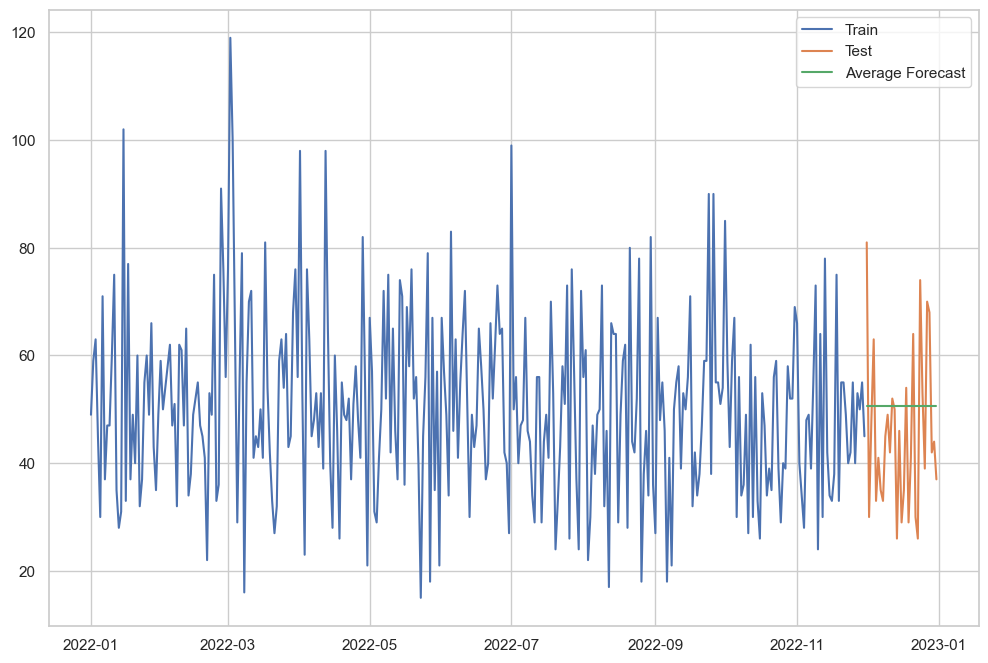

In [65]:
y_hat_avg = df_test.copy()
y_hat_avg['avg_forecast'] = df_train['Qty'].mean()
plt.figure(figsize=(12,8))
plt.plot(df_train['Qty'], label='Train')
plt.plot(df_test['Qty'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [66]:
rms = sqrt(mean_squared_error(df_test.Qty, y_hat_avg.avg_forecast))
print(rms)

15.39438908038407


We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.

## **📌 Method 3: Simple Moving Average (SMA)**

In this technique, we will take the average of the Quantity for the last few time periods only. Here the predictions are made on the basis of the average of the last few points instead of taking all the previously known values.

I am using the past 60 time periods moving average which means I feel the step count is mostly affected by the step count for the previous 60 days. You can choose to use a different number. The common time periods used in moving average are 10,20,30,50,100 depending on the scenario.

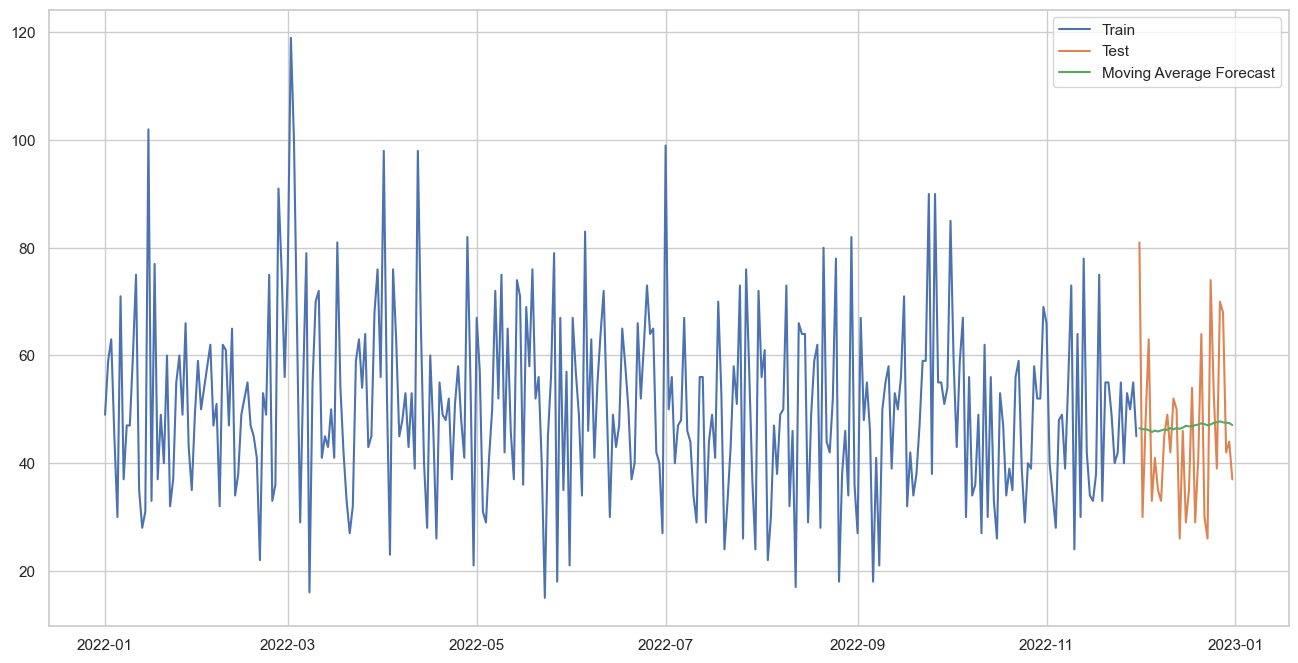

In [67]:
y_hat_avg = df_test.copy()

df_window = df_train['Qty'].iloc[-60:]

frc = []
for i in range(len(df_test)):
    n = df_window.rolling(60).mean().iloc[-1]
    frc.append(n)
    df_window = df_window.append(pd.Series([n])).iloc[-60:]
    
y_hat_avg['moving_avg_forecast'] = frc
plt.figure(figsize=(16,8))
plt.plot(df_train['Qty'], label='Train')
plt.plot(df_test['Qty'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

We chose the data of last 1 month only. We will now calculate RMSE to check to accuracy of our model.

In [68]:
rms = sqrt(mean_squared_error(df_test.Qty, y_hat_avg.moving_avg_forecast))
print(rms)

14.463679540573983


We can see that Naive method outperforms both Average method and Moving Average method for this dataset. Now we will look at Simple Exponential Smoothing method and see how it performs.

An advancement over Moving average method is Weighted moving average method. In the Moving average method as seen above, we equally weigh the past ‘n’ observations. But we might encounter situations where each of the observation from the past ‘n’ impacts the forecast in a different way. Such a technique which weighs the past observations differently is called Weighted Moving Average technique.

## **📌 Method 4: Simple Exponential Smoothing** ###

After we have understood the above methods, we can note that both Simple average and Weighted moving average lie on completely opposite ends. We would need something between these two extremes approaches which takes into account all the data while weighing the data points differently. 

For example it may be sensible to attach larger weights to more recent observations than to observations from the distant past. 

The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations

In this technique, we assign larger weights to more recent observations than to observations from the distant past.

The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.


From the documentation:

"Simple exponential smoothing has a “flat” forecast function.

That is, all forecasts take the same value, equal to the last level component. Remember that these forecasts will only be suitable if the time series has no trend or seasonal component."

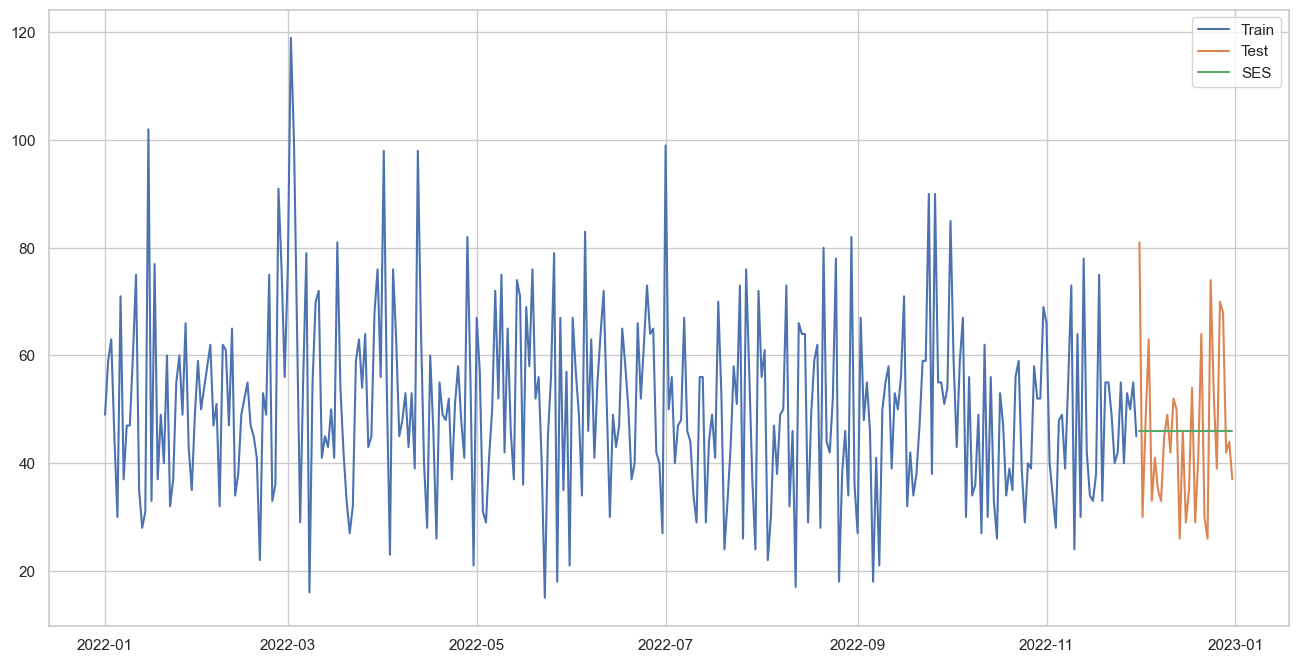

In [69]:
y_hat_avg = df_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(df_train['Qty'])).fit(smoothing_level=0.9,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['Qty'], label='Train')
plt.plot(df_test['Qty'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [70]:
rms = sqrt(mean_squared_error(df_test.Qty, y_hat_avg.SES))
print(rms)

14.530761990410328


We can see that implementing Simple exponential model with alpha as 0.9 generates a better model till now. We can tune the parameter using the validation set to generate even a better Simple exponential model.

## **📌 Method 5: Holt’s Linear Trend method**

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

We can decompose the time series into four parts.

- Observed, which is the original time series.
- Trend, which shows the trend in the time series, i.e., increasing or decreasing behavior of the time series.
- Seasonal, which tells us about the seasonality in the time series.
- Residual, which is obtained by removing any trend or seasonality in the time series.

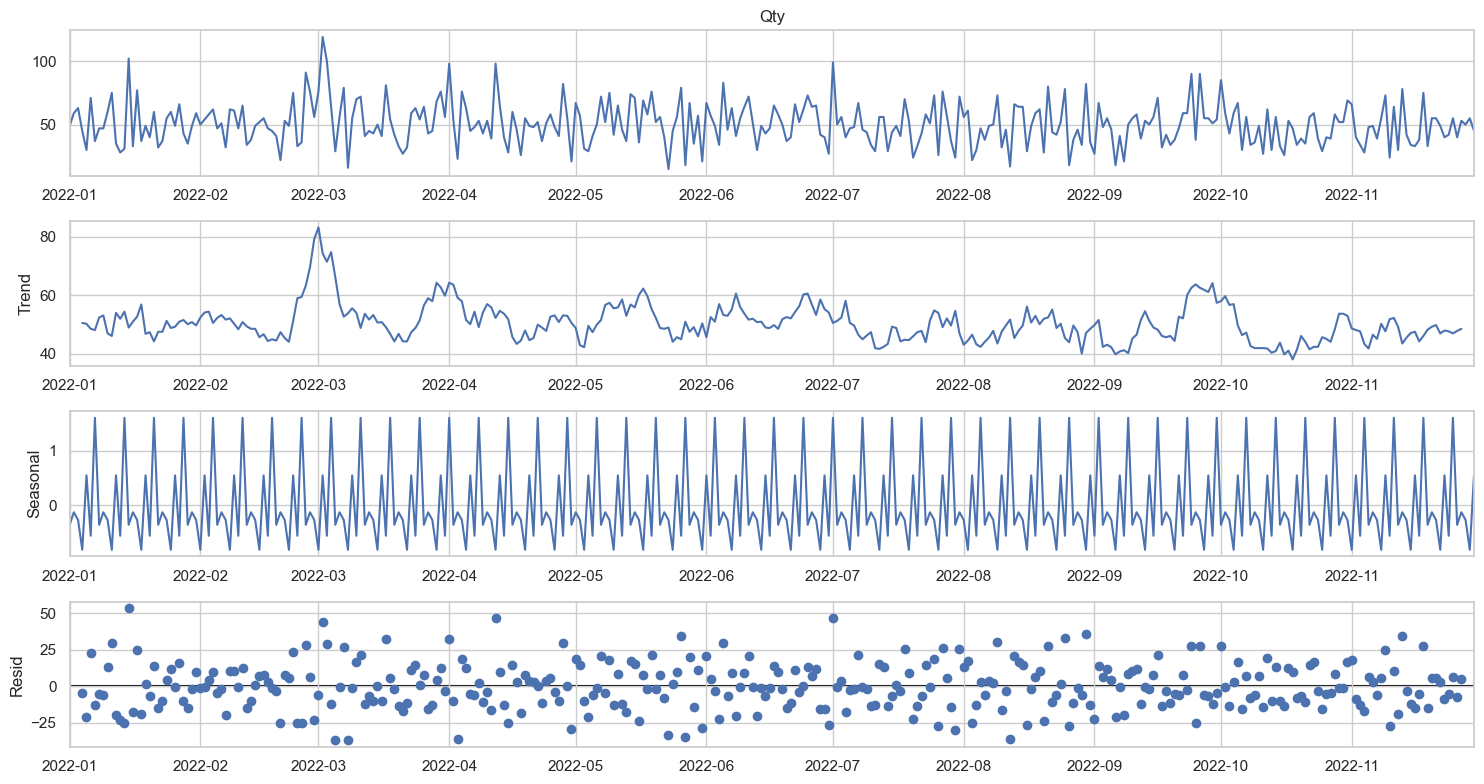

In [71]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(df_train.Qty).plot()
result = sm.tsa.stattools.adfuller(df_train.Qty)
plt.show()

We can see from the graphs obtained that this dataset follows
- Tidak Ada Trend
- Ada Seasonal

---

Holt’s Linear Trend Model

- It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
- This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

Walaupun Holt membutuhkan Trend, tetapi tetap kita akan mencoba teknik ini untuk pembelajaran dan eksperimen

We have now learnt several methods to forecast but we can see that these models don’t work well on data with high variations. Consider that the Quantity is increasing.

If we use any of the above methods, it won’t take into account this trend. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

Although each one of these methods can be applied to the trend as well.  E.g. the Naive method would assume that trend between last two points is going to stay the same, or we could average all slopes between all points to get an average trend, use a moving trend average or apply exponential smoothing.

But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

Holt extended simple exponential smoothing to allow forecasting of data with a trend.

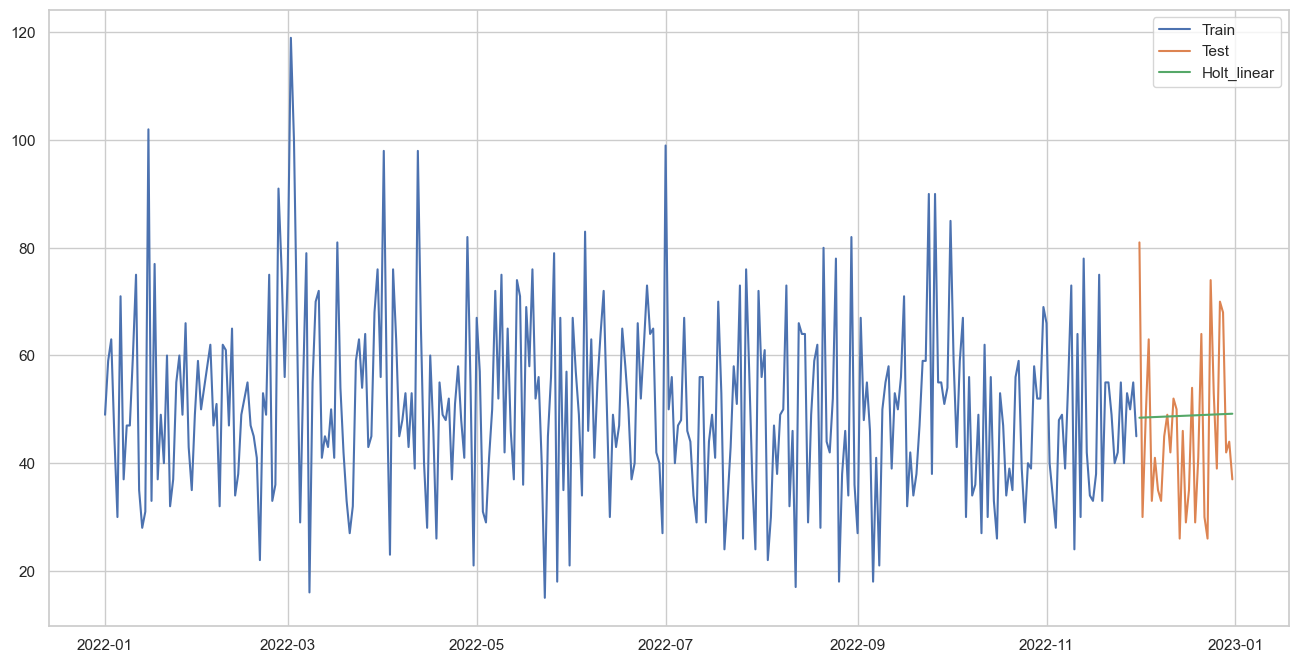

In [72]:
y_hat_avg = df_test.copy()

fit1 = Holt(np.asarray(df_train['Qty'])).fit(smoothing_level = 0.6,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(df_test))

plt.figure(figsize=(16,8))
plt.plot(df_train['Qty'], label='Train')
plt.plot(df_test['Qty'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [73]:
rms = sqrt(mean_squared_error(df_test.Qty, y_hat_avg.Holt_linear))
print(rms)

14.897994517178734


We can see that this method maps the trend more and hence provides same as before solution when compared with above models, mungkin dikarenakan tidak ada trend dalam data. We can still tune the parameters to get even a better model.

## **📌 Method 6: Holt-Winters Method**

So let’s introduce a new term which will be used in this algorithm. Such a repetition is called Seasonality. Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

Using Holt’s winter method will be the best option among the rest of the models beacuse of the seasonality factor. The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations

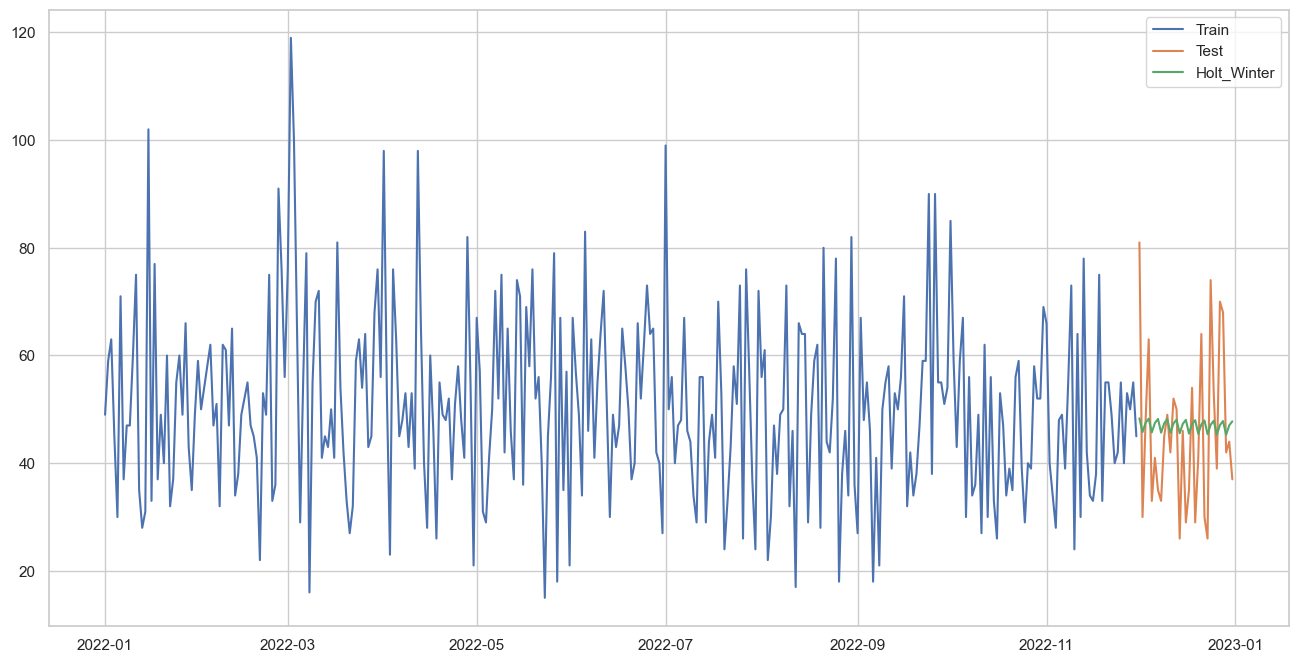

In [74]:
y_hat_avg = df_test.copy()
fit1 = ExponentialSmoothing(np.asarray(df_train['Qty']) ,seasonal_periods=3 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot( df_train['Qty'], label='Train')
plt.plot(df_test['Qty'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [75]:
rms = sqrt(mean_squared_error(df_test.Qty, y_hat_avg.Holt_Winter))
print(rms)

14.184398711683253


We can see from the graph that mapping correct trend and seasonality provides a far better solution. We chose seasonal_period = 3 as data repeats itself tiap 3 hari. Other parameters can be tuned as per the dataset. I have used default parameters while building this model. You can tune the parameters to achieve a better model.

## **📌 Method 7: ARIMA**

Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of Quantity, which allows us to forecast future values in terms of a linear combination of past values. We will use the auto_arima package, which will allow us to forgo the time consuming process of hyperparameter tuning.

ARIMA adalah gabungan antara dua metode, yaitu Auto Regressive (AR) dan Moving Average (MA). Tujuan utama dari ARIMA adalah melakukan autocorrelation pada data.

Syarat agar data dapat diolah menggunakan ARIMA adalah data harus bersifat stasioner. Stasioner dalam time series memiliki arti bahwa pada data time series yang kita miliki tidak memiliki trend maupun seasonal dan berfluktuasi disekitar mean nya.

### **⛳ Check ACF and PACF** ###

How to determine AR(p),MA(q) and I(d) values for ARIMA model?

- `Auto-Regressive/AR`: The output prediction is dependent on the previous observations/lagged observations

- `Integrated/I`: The data is not stationary and it requires certain order of differencing to achieve the stationarity

- `Moving Average/MA`: The output prediction is dependent on previous error terms/lagged errors

**AR(p) : Auto Regressive**

Auto regressive di ARIMA artinya kita membuat model linear regression berdasarkan lag dari datanya sebagai prediktor.

Ingat! Syarat linear regression models dikatakan baik:

- Prediktor tidak ada korelasi

- Prediktor independen satu sama lainnya

Nilai p berarti berapa banyak data yang akan dipakai ketika melakukan auto regressive.

Untuk mencari order p untuk model AR, kita dapat melihat dari plot PACF (Partial Autocorrelation Function).

**I(d) : Integrated**

Integrated adalah berapa kali data dilakukan differencing untuk membuat suatu data stationer. Nilai d dapat diketahui dengan mencari tahu berapa kali differencing yang dilakukan pada data

**MA(q) : Moving Average**

Moving Average dalam ARIMA artinya kita melakukan rata-rata berjalan terhadap data time series itu sendiri.

Nilai q berarti berapa banyak data yang diperlukan untuk smoothing error menggunakan moving average.

Untuk mencari order q untuk model MA, kita dapat melihat dari plot ACF (Auto correlation Function)

> ARIMA memiliki model ARIMA(p,d,q)

> p: ordo AR, tentukan dari plot PACF(partial autocorrelation function)

> d: berapa kali differencing (hasil adf.test)

> q: ordo MA, tentukan dari plot ACF(autocorrelation function)

melihat plot pacf dan acf untuk menemukan nilai AR(p) dan MA(q)

Ada 2 tipe pola pada plot PACF dan ACF

- tails off: garis lag mengalami penurunan yang lambat.

- cuts off lag: garis mengalami perubahan yang cepat (signifikan)


What is the best way to select the value of p,q and d?Permalink

- For Moving Average order i.e. q you have to look at the Auto Correlation Factor(ACF) graph. You need some experience to keenly look at the graphs and significant lags and corresponding Correlations to determine the value

- Similarly for the Auto-Regressive order i.e. p you have to look at the partial correlation factor (pacf) graph

- Another Alternate way is to find the set of models with the lowest AIC values Akaike’s Information Criterion

- For determining AIC you have to fit the model with different combination of p,q and d and look for the lowest AIC value

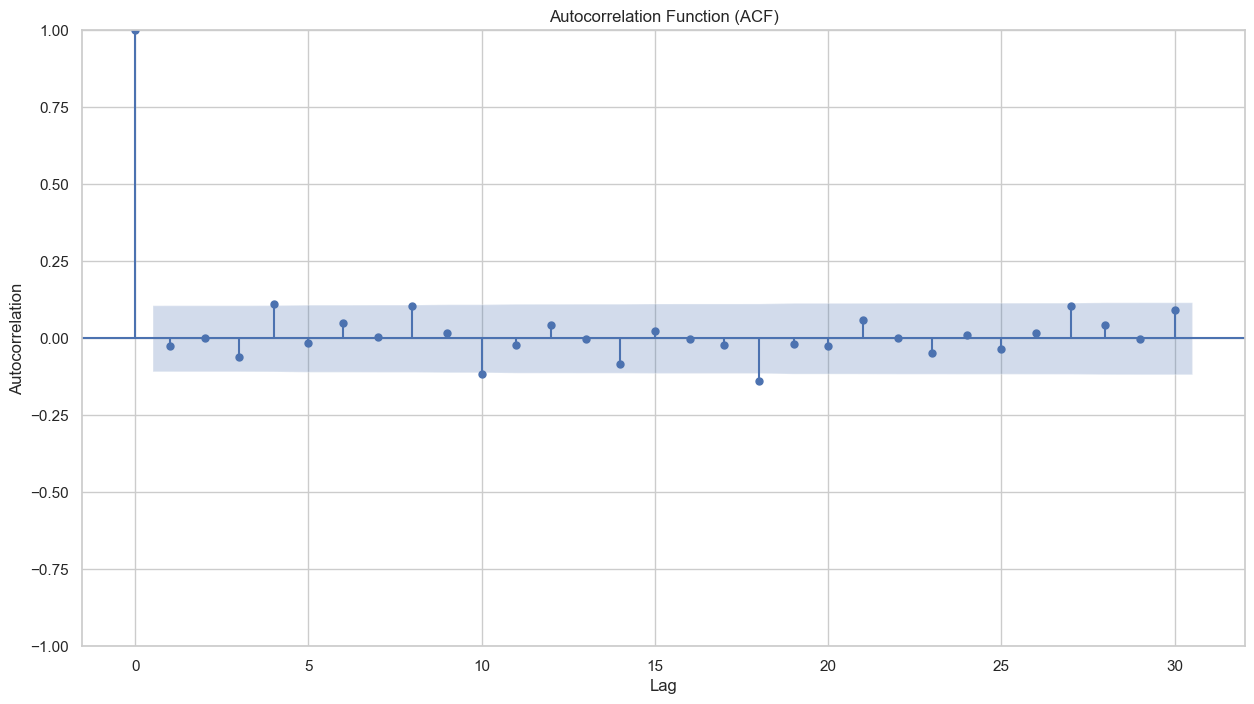

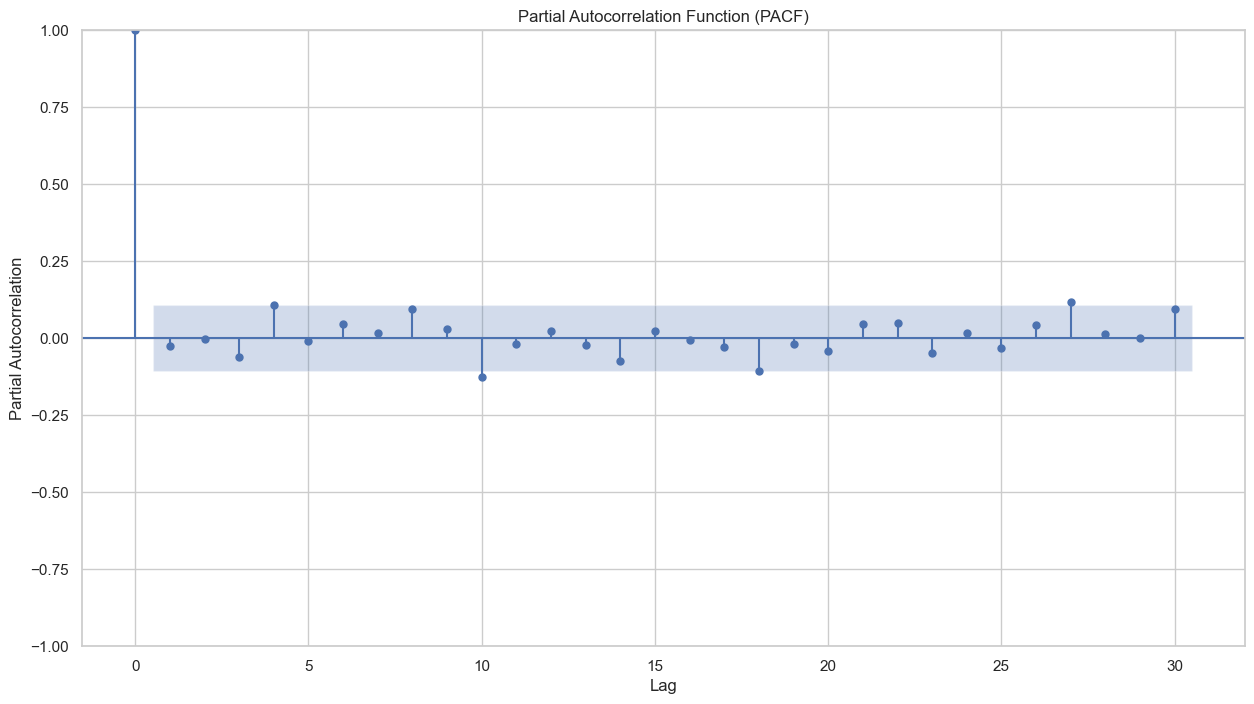

In [76]:
import warnings
warnings.filterwarnings("ignore")

# Check ACF using default method
plot_acf(df_train, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Check PACF using ywm method
plot_pacf(df_train, lags=30,  method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

From the PACF plot we can see a significant correlation at lag of 2. So the PACF suggests an AR(2) model. 

Remember our d value is 0 because our data was stationary before differencing.

So an inital order for the model will be (2,0,3)

Alternatively, you can also use auto arima to find the appropriate value of p,q and d

### **⛳ ARIMA Model Prediction** ##

#### **📌 Using Auto ARIMA Model Best Orders**

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [77]:
# check Best Model using auto ARIMA
auto_arima_model = pm.auto_arima(df_train['Qty'],
                                 start_p=1, start_q=1,
                                 max_p=5, max_q=5, 
                                 start_P=0, d=1, D=1, start_Q=0,
                                 seasonal=True, trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3067.753, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2969.103, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3065.753, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2939.868, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2897.396, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2889.363, Time=0.51 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2878.729, Time=0.44 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2876.730, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2887.364, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2838.167, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2836.268, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1412.134
Date:                Sun, 03 Sep 2023   AIC                           2836.268
Time:                        21:28:56   BIC                           2859.117
Sample:                    01-01-2022   HQIC                          2845.379
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0253      0.049     -0.513      0.608      -0.122       0.071
ar.L2         -0.0099      0.054     -0.183      0.855      -0.115       0.096
ar.L3         -0.0639      0.054     -1.176      0.240      -0.170       0.043
ar.L4          0.1000      0.053      1.889      0.059      -0.004       0.204
ma.L1         -0.9877      0.013    -74.504      0.000      -1.014      -0.962
sigma2       279.2474     20.980     13.310      0.000     238.128     320.367
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.52
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
# Assign the ARIMA model using best model from auto arima
best_order = auto_arima_model.order
print(best_order)

# FIX ValueWarning: No frequency information was provided, so inferred frequency D will be used
df_train.index = pd.DatetimeIndex(df_train.index.values,
                               freq=df_train.index.inferred_freq)

# Fitting
model = ARIMA(df_train, order=best_order)
arima_model = model.fit()
print(arima_model.summary())

(4, 1, 1)
                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  334
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -1412.134
Date:                Sun, 03 Sep 2023   AIC                           2836.268
Time:                        21:28:56   BIC                           2859.117
Sample:                    01-01-2022   HQIC                          2845.379
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0253      0.049     -0.513      0.608      -0.122       0.071
ar.L2         -0.0099      0.054     -0.183      0.855      -0.115       0.096
ar.L3         -0.0639      0.054     -1.17

**Model Evaluation**

In [79]:
df_forecast = auto_arima_model.predict(len(df_test))
forecast = df_forecast.copy()

mae = mean_absolute_error(df_test['Qty'], forecast)
mape = mean_absolute_percentage_error(df_test['Qty'], forecast) * 100
rmse = mean_squared_error(df_test['Qty'], forecast, squared=False)

print(f"MAE: {mae}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse}")

MAE: 12.452941788727399
MAPE: 31.26%
RMSE: 14.862433993742613


#### **📌 Using Manual Tuning ARIMA Model** ###

In [80]:
def arima_tune(p,d,q):
    model = ARIMA(df_train, order=(p,d,q))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_test))
    
    mae = mean_absolute_error(df_test, forecast_test)
    mape = mean_absolute_percentage_error(df_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_test, forecast_test))
    
    return mae,mape,rmse
    
#Parameter combinations
pval = [30,50,60,70]
dval = [1]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = arima_tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'Orders Param (p,d,q)':param,'MAE':mae_score,'MAPE':mape_score,'RMSE':rmse_score})
tuning_df.sort_values(by='RMSE').head(3)

,"Orders Param (p,d,q)",MAE,MAPE,RMSE
2,"(60, 1, 1)",11.946,0.280,14.664
0,"(30, 1, 1)",12.595,0.306,15.334
3,"(70, 1, 1)",12.632,0.307,15.391


In [81]:
#Manual parameter tuning
model = ARIMA(df_train, order=(60, 1, 1))
model_fit = model.fit()

**Model Evaluation**

In [82]:
forecast_manual = model_fit.forecast(steps=len(df_test))

mae = mean_absolute_error(df_test['Qty'], forecast_manual)
mape = mean_absolute_percentage_error(df_test['Qty'], forecast_manual) * 100
rmse = mean_squared_error(df_test['Qty'], forecast_manual, squared=False)

print(f"MAE: {mae}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse}")

MAE: 11.94583740596518
MAPE: 28.01%
RMSE: 14.663765285472858


#### **📌 Plotting Forecasting ARIMA**

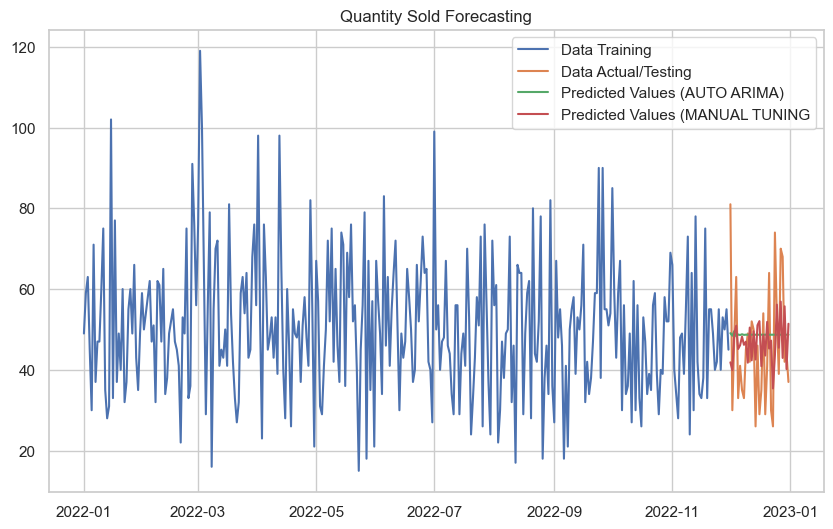

In [83]:
# AUTO ARIMA

# Create new dataframe for forecasting
forecast_period = df_test.shape[0]
# # forecast = arima_model.forecast(steps=forecast_period)
# forecast = auto_arima_model.predict(len(df_test))
# forecast_index = pd.date_range(start=df_test.index[-1], periods=forecast_period)
# df_forecast = pd.DataFrame(forecast, index=forecast_index, columns=['Qty'])

forecast_auto = auto_arima_model.predict(len(df_test))

# MANUAL TUNING ARIMA

forecast_manual = model_fit.forecast(steps=forecast_period)

# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['Qty'], label='Data Training')
plt.plot(df_test.index, df_test['Qty'], label='Data Actual/Testing')
plt.plot(forecast_auto.index, forecast_auto, label='Predicted Values (AUTO ARIMA)')
plt.plot(forecast_manual.index, forecast_manual, label='Predicted Values (MANUAL TUNING')
plt.title('Quantity Sold Forecasting')
plt.legend()
plt.show()

# **🚀 Business Insight 🚀**

The performance of the models on the test data (RMSE) is summarized below:

- Naive Forecast : RMSE of 14.52
- Simple Average : RMSE of 15.39
- Simple Moving Average (SMA) : RMSE of 14.46
- Simple Exponential Smoothing : RMSE of 14.53
- Holt Linear Trend Model : RMSE of 14.89
- Holt-Winters Method : RMSE of 14.18
- ARIMA Auto Arima : RMSE of 14.86
- ARIMA Manual Tuning : RMSE of 14.66

### **📌 Daily Quantity Products Sold Forecasting** ###

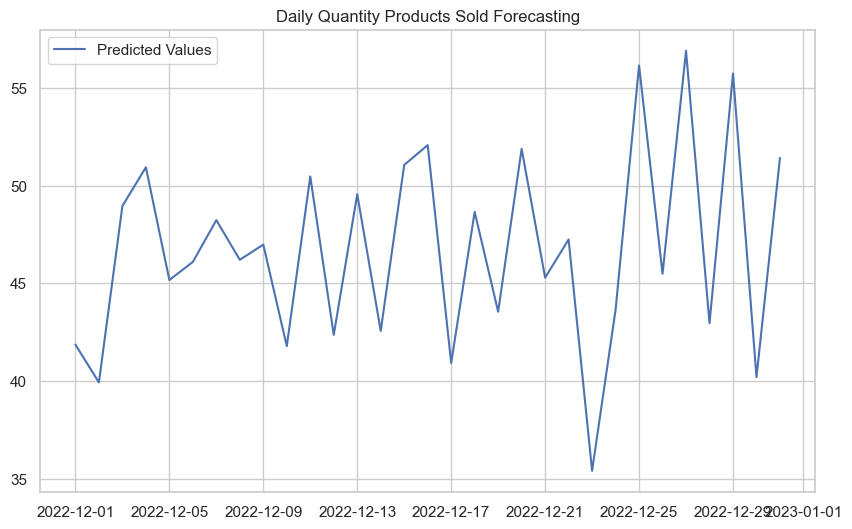

In [84]:
# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(forecast_manual.index, forecast_manual, label='Predicted Values')
plt.title('Daily Quantity Products Sold Forecasting')
plt.legend()
plt.show()

In [85]:
# Check Mean Quantity Sold per Day
avg_qty_sold = forecast_manual.mean()
print(f"Average of Quantity Products Sold Per day: {avg_qty_sold}")

Average of Quantity Products Sold Per day: 46.75774220640568


**Observation:**

Based on graph above, It shows that **Daily Quantity Products Sold Forecasting** in the nex month with average all product sold each day is 40 - 50 pieces.

### **📌 Quantity Sold Each Product Forecasting** ###

In [86]:
best_order = (60, 1, 1)
# forecasting quantity of each product for 1 month
product_forecast = df[['Qty', 'Date', 'ProductName']]

# List of product
product_list = product_forecast['ProductName'].unique()

# Create new dataFrame to store the forecasts
forecast_date = pd.DataFrame({'Date': pd.date_range(start='2023-01-01', end='2023-01-30')})

# Fit the function to ARIMA model and make the forecasts
def fit_arima_forecast(df_prod_forecast):
    model = ARIMA(df_prod_forecast['Qty'], order=best_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)
    return forecast

# Group data by 'ProductName', and then apply the forecasting function for each group
for i, group in product_forecast.groupby('ProductName'):
    df_prod_forecast = group[['Date', 'Qty']]
    df_prod_forecast = df_prod_forecast.groupby('Date')[['Qty']].sum()

    # Set the index to fill missing dates
    df_prod_forecast = df_prod_forecast.reindex(pd.date_range(start='2022-01-01', end='2022-12-31'), fill_value=0)

    # Fit ARIMA model and make forecasts
    forecast1 = fit_arima_forecast(df_prod_forecast)

    # Add forecasts to the main DataFrame
    forecast_date[i] = forecast1.values

forecast_date = forecast_date.set_index('Date')
forecast_date.head()

,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt
Date,,,,,,,,,,
2023-01-01,0.804,4.554,3.021,7.124,2.955,6.588,1.682,5.946,7.123,8.284
2023-01-02,1.906,4.081,2.213,7.429,6.215,7.334,2.739,8.640,8.175,3.875
2023-01-03,2.963,5.374,8.421,4.916,3.984,7.344,1.795,7.375,8.115,7.737
2023-01-04,3.882,2.610,2.142,5.539,3.893,9.567,1.698,4.594,5.586,6.249
2023-01-05,1.711,6.785,4.816,7.171,4.176,7.714,3.021,3.582,10.241,6.832


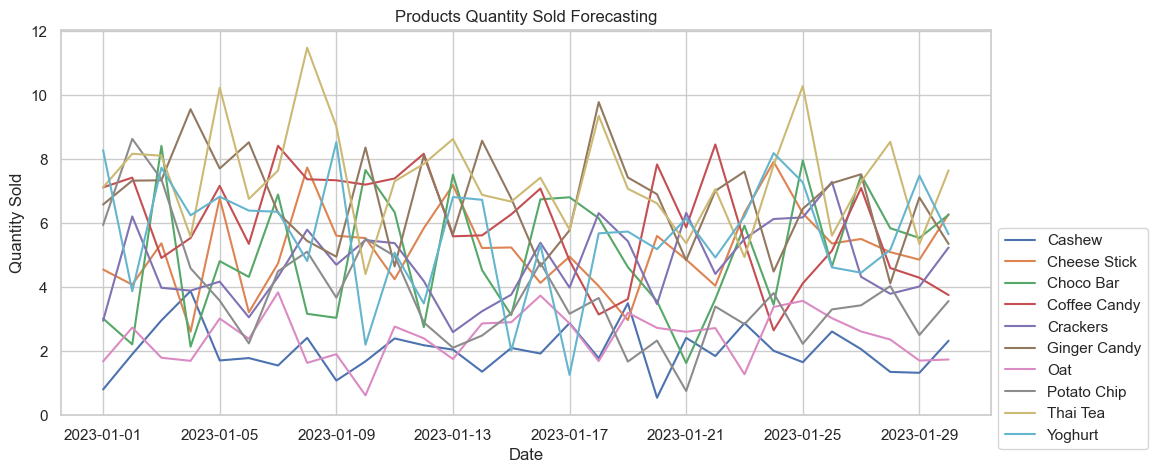

In [87]:
# Plot forecasting
plt.figure(figsize=(12, 5))
for i in forecast_date.columns:
    plt.plot(forecast_date.index, forecast_date[i], label=i)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
plt.title('Products Quantity Sold Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

In [88]:
# Check mean per product sold daily
avg_qty_per_product = df.groupby('ProductName')['Qty'].mean().round()
avg_qty_per_product_table = pd.DataFrame(avg_qty_per_product).reset_index()
avg_qty_per_product_table.columns = ['Product Name', 'Average of Quantity Sold Daily']

# Convert the DataFrame to a nicely formatted table
table = tabulate(avg_qty_per_product_table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)

╒════════════════╤══════════════════════════════════╕
│ Product Name   │   Average of Quantity Sold Daily │
╞════════════════╪══════════════════════════════════╡
│ Cashew         │                                2 │
├────────────────┼──────────────────────────────────┤
│ Cheese Stick   │                                3 │
├────────────────┼──────────────────────────────────┤
│ Choco Bar      │                                6 │
├────────────────┼──────────────────────────────────┤
│ Coffee Candy   │                                4 │
├────────────────┼──────────────────────────────────┤
│ Crackers       │                                4 │
├────────────────┼──────────────────────────────────┤
│ Ginger Candy   │                                5 │
├────────────────┼──────────────────────────────────┤
│ Oat            │                                2 │
├────────────────┼──────────────────────────────────┤
│ Potato Chip    │                                3 │
├────────────────┼──────────

**Observation:**

Based on graph and table above, It shows that **Quantity Sold Each Product Forecasting** in the next month. Top 2 products that are predicted to sell the most every day are `Choco Bar` products with an average of 6 products sold per day, and `Ginger Candy` products with an average of 5 products sold per day.